# Project- Yes_Bank_Stock_Closing_Price_Prediction

# **YES BANK STOCK CLOSING PRICE PREDICTION**

In [ ]:

# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_yesbank = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [ ]:
# Load the dataset
#df_yesbank = pd.read_csv("/content/data_YesBank_StockPrices.csv")

 1.   Define the problem statement: The goal of this project is to build a machine learning model that can predict the closing price of Yes Bank stock for future months based on historical data. The model will assist investors and financial analysts in making informed decisions about Yes Bank stock investments.

1.1. Understand the Industry - Type of Problem
This is a supervised regression problem as we are predicting the closing price based on historical data.

 1.2. Understand the Business Objective
The objective is to predict the closing price of Yes Bank stock, which can be useful for investors and traders.

1.3. Constraints & Limitations
* - Computational Power: Ensure that the model can run on standard hardware.
*  - Budget: The project should not have excessive costs.
* - Data Availability: Historical stock price data is needed.
*  - Obstacles: Stock prices can be influenced by many factors, making prediction challenging.

 1.4. Evaluation Metrics
We will use metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for model evaluation.

1.5. Relevancy to the Target Audience
The model's predictions are relevant to investors and traders who want to make informed decisions quickly.

 1.6. Data Availability
 Historical stock price data is available, but additional features may be required for more accurate predictions.

 1.7. Scope of the Solution
 The solution aims to predict the closing price accurately but may not account for extreme market events.

 1.8. Deployment Considerations
 The model can be deployed on a cloud platform or integrated into a web application.


##2. Data Collection
 2.1. Source Identification:
The data for this project was obtained from historical stock price records of Yes Bank. These records are typically maintained by stock exchanges, financial data providers, or publicly available sources.

2.2. Data Volume Required:
For accurate analysis and prediction, a sufficient historical dataset is required. In this project, we have used a dataset covering monthly stock prices of Yes Bank from its listing in July 2005 to November 2020.

 2.3. Data Types:
The dataset consists of labeled data with the following features:
*  - Date: Date of the stock price observation.
*  - Open: The opening price of the stock for the month.
*  - High: The highest price reached by the stock during the month.
*  - Low: The lowest price reached by the stock during the month.
*  - Close: The closing price of the stock for the month.

2.4. Data Quality: Data quality is essential for reliable analysis. Any errors or biases in the data should be addressed. This includes handling missing values, outliers, and ensuring data consistency.

2.5. Data Relevancy:
The collected data is directly relevant to predicting stock prices. It includes the necessary information for time-series analysis and prediction.

2.6. Temporal Considerations:
Time-related effects, seasonality, and changes in the data are considered in the analysis. Stock prices can exhibit patterns based on the time of year and economic conditions.

2.7. Legal and Ethical Concerns: Data privacy and ethics are crucial. For this project, there are no specific legal or ethical concerns related to data privacy since the dataset contains publicly available historical stock prices.

2.8. Sampling Strategy:
In this project, the entire population of data (i.e., the complete historical dataset) is used for analysis. No sampling is applied.

2.9. Data Privacy:
Sensitive information is not present in this dataset. It primarily contains publicly available financial data related to stock prices.

2.10. Data Collection Tools:
The data for this project was obtained from historical stock records, and no additional tools were required for data collection.

2.11. Data Versioning:
Implementing version control for managing changes in the dataset can be useful, especially if the dataset is regularly updated. It helps keep track of data changes and maintain a historical record of dataset versions.

2.12. Continuous Data Collection:
 For ongoing accuracy and relevance of the model, regular updates of stock data may be required, especially if the model is deployed in a real-time or near-real-time environment. This ensures that the model adapts to the most recent data.


# 3. Data Preprocessing

In [ ]:
# Display the first few rows of the dataset
df_yesbank.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,0.007844
1,Aug-05,12.58,14.88,12.55,0.010881
2,Sep-05,13.48,14.87,12.27,0.010501
3,Oct-05,13.20,14.47,12.40,0.009520
4,Nov-05,13.35,13.88,12.88,0.010849


In [ ]:
# Display the last few rows of the dataset
df_yesbank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,0.006231
181,Aug-20,12.00,17.16,11.85,0.013885
182,Sep-20,14.30,15.34,12.75,0.010027
183,Oct-20,13.30,14.01,12.11,0.007718
184,Nov-20,12.41,14.90,12.21,0.014834


In [ ]:
# Summary statistics of the dataset
df_yesbank.describe()


,Open,High,Low,Close
count,176.000000,176.000000,176.000000,176.000000
mean,93.626818,102.891648,83.281534,0.261118
std,85.497500,90.923320,76.939575,0.262657
min,10.000000,11.240000,5.550000,0.000000
25%,31.080000,34.925000,26.650000,0.066248
50%,61.900000,69.690000,54.650000,0.163857
75%,139.620000,153.980000,126.587500,0.407911
max,355.000000,375.750000,304.650000,1.000000


In [ ]:
# Check for duplicates
df_yesbank.duplicated().sum()

0

In [ ]:
# Check for null values
df_yesbank.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# Convert the 'Date' column to datetime

df_yesbank['Date']=pd.to_datetime(df_yesbank['Date'])

In [ ]:
# Display the first few rows of the 'Date' column
print(df_yesbank['Date'].head())


0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]


In [ ]:
#Handling Missing Values
# Let's start by addressing missing values in the dataset:
# Method 1: Mean/Median/Mode Replacement
# For numeric features, you can replace missing values with the mean, median, or mode of the respective column.

df_yesbank['Close'].fillna(df_yesbank['Close'].mean(), inplace=True)

In [ ]:
# Method 2: Handling Duplicates
# Check for duplicate rows in the dataset and remove them if any
df_yesbank.drop_duplicates(inplace=True)

In [ ]:

# 3.2. Handling Outliers

# Method 1: Using IQR (Interquartile Range)
#This method can help improve data quality.

Q1 = df_yesbank['Close'].quantile(0.25)
Q3 = df_yesbank['Close'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5  # You can adjust this threshold
outliers = df_yesbank[(df_yesbank['Close'] < (Q1 - threshold * IQR)) | (df_yesbank['Close']) > (Q3 + threshold * IQR)]

In [ ]:

# Standardize the 'Close' column to have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_yesbank['Close'] = scaler.fit_transform(df_yesbank[['Close']])

# Method 2: Normalization
# Normalize the 'Close' column to a range between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_yesbank['Close'] = scaler.fit_transform(df_yesbank[['Close']])


3.5. Handling Imbalanced Dataset
 In your specific problem of stock price prediction, imbalanced dataset handling may not appl

# Exploratory Data Analysis (EDA) - Uncover Insights, Ignite Understanding.


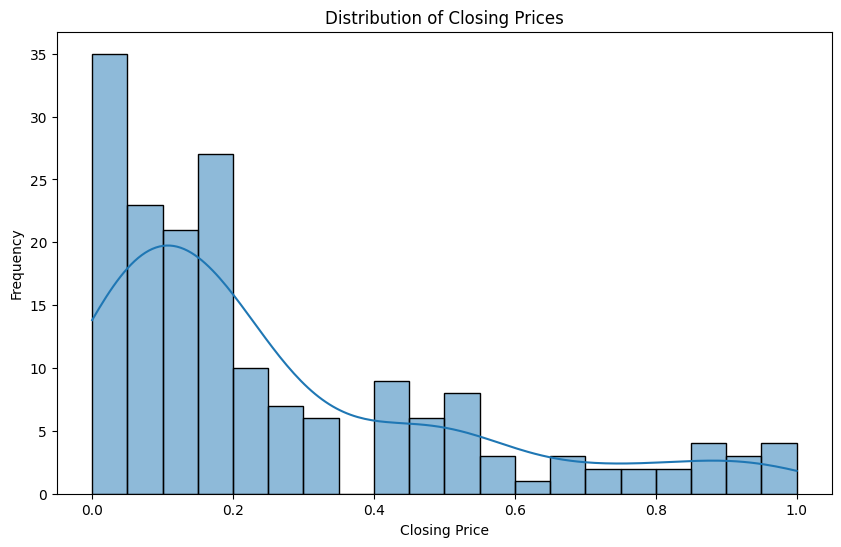

In [ ]:
# Summary statistics
summary_stats = df_yesbank.describe()

# Histogram for the 'Close' column
plt.figure(figsize=(10, 6))
sns.histplot(df_yesbank['Close'], bins=20, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()




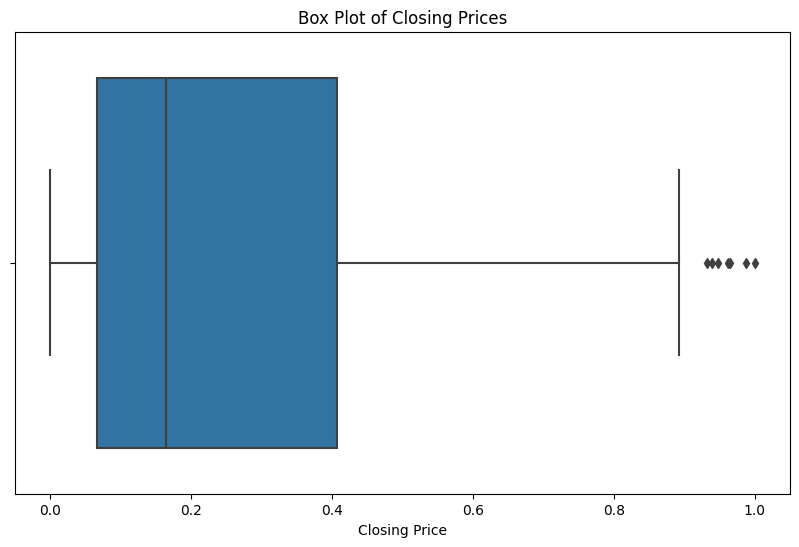

In [ ]:
# Box plot for the 'Close' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_yesbank['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Closing Price')
plt.show()

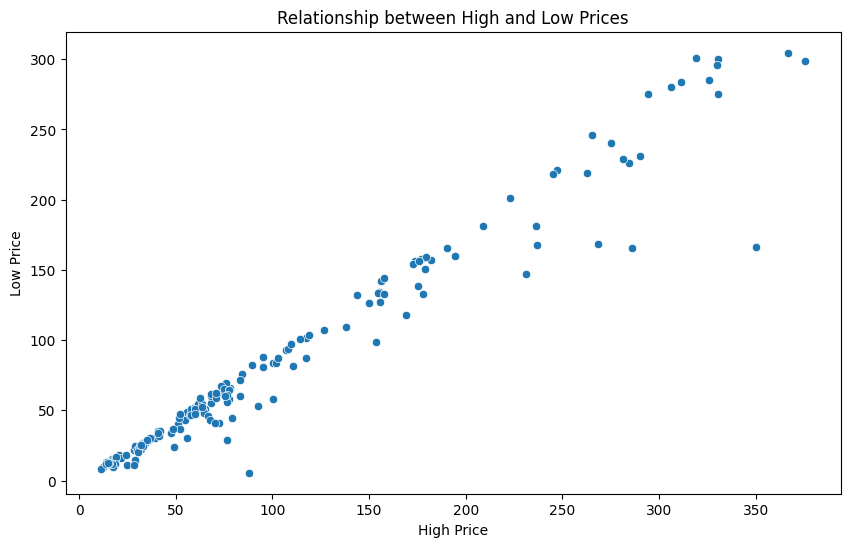

In [ ]:
# Scatter plot for 'High' and 'Low'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='High', y='Low', data=df_yesbank)
plt.title('Relationship between High and Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()


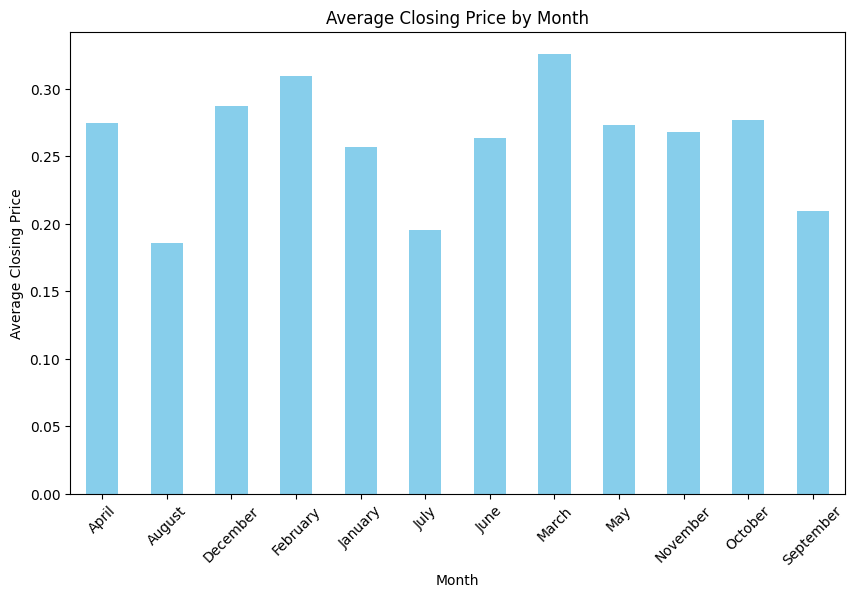

In [ ]:
# Group data by month and calculate the average closing price
monthly_avg_close = df_yesbank.groupby(df_yesbank['Date'].dt.strftime('%B'))['Close'].mean()

# Bar chart for average closing price by month
plt.figure(figsize=(10, 6))
monthly_avg_close.plot(kind='bar', color='skyblue')
plt.title('Average Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.show()


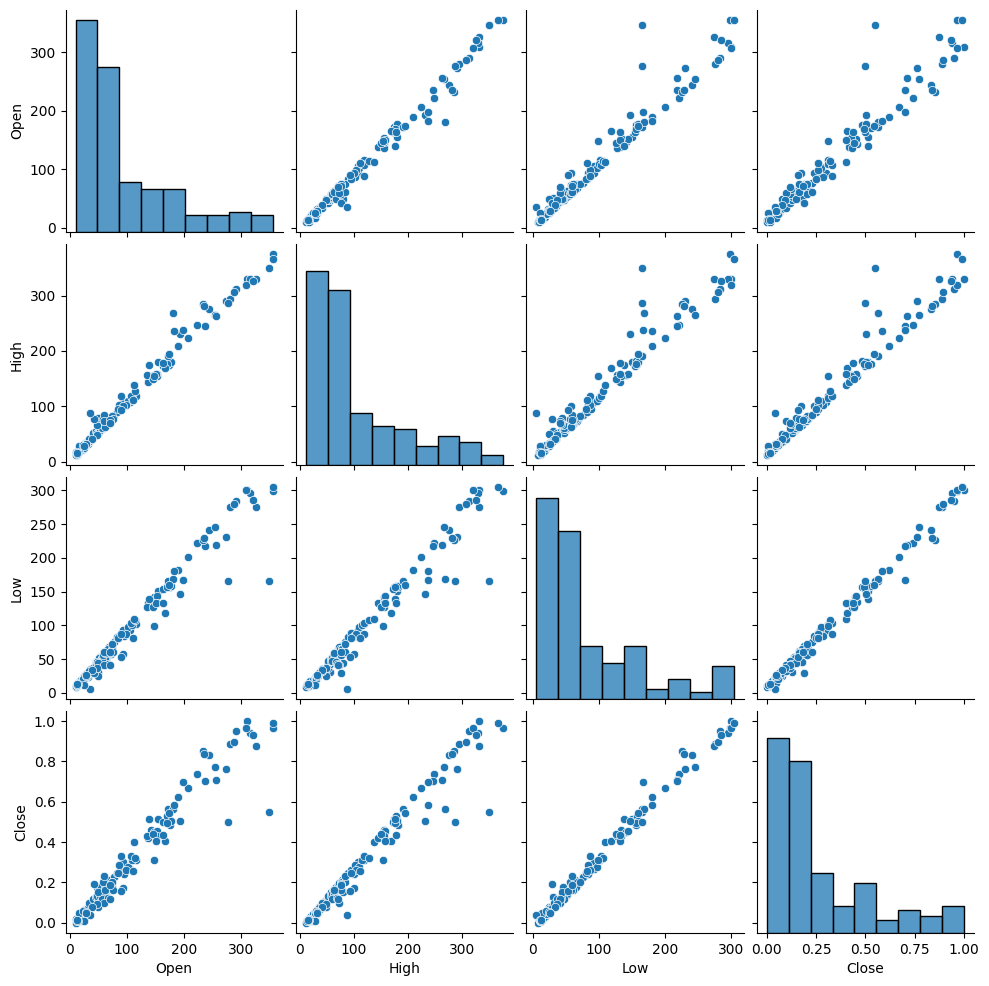

In [ ]:
# Import the seaborn library for pair plots
import seaborn as sns

# Select numerical columns for the pair plot
numerical_columns = ['Open', 'High', 'Low', 'Close']

# Create a pair plot
sns.pairplot(df_yesbank[numerical_columns])
plt.show()


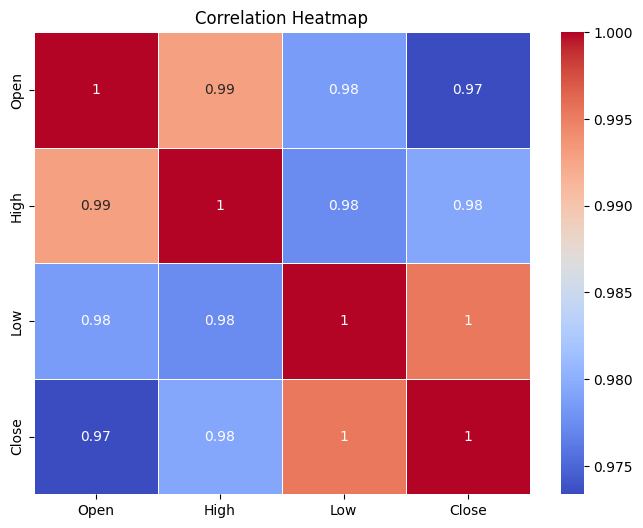

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_yesbank[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


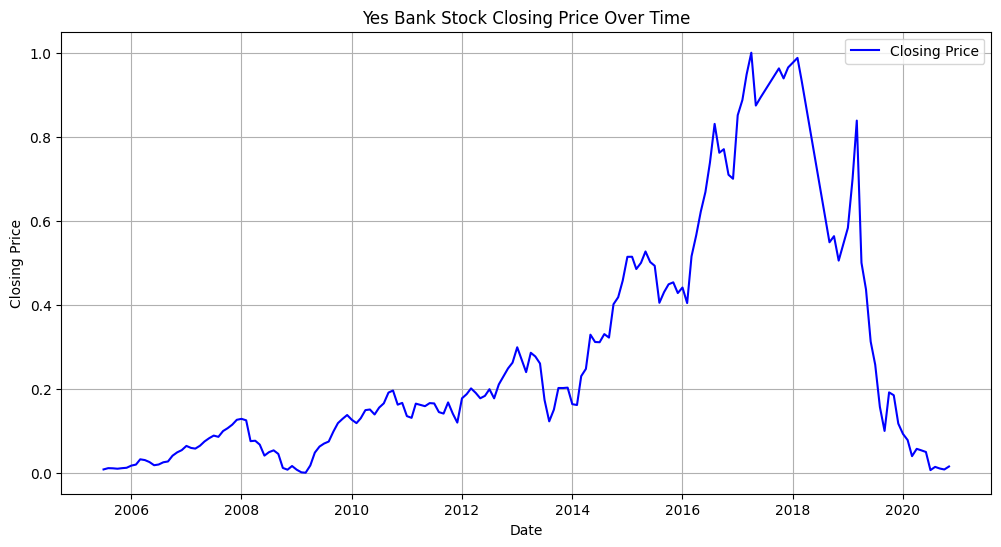

In [ ]:
# Set the 'Date' column as the index for time series analysis
df_yesbank.set_index('Date', inplace=True)

# Plot the closing price of the stock over time
plt.figure(figsize=(12, 6))
plt.plot(df_yesbank.index, df_yesbank['Close'], label='Closing Price', color='blue')
plt.title('Yes Bank Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# 5. Model Selection, Training & Evaluation

In [ ]:
# 5.1. Model Selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select a model
model = RandomForestRegressor()

In [ ]:
# 5.2. Data Split
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets (e.g., 70-15-15 split)
X = df_yesbank.drop(['Close'], axis=1)
y = df_yesbank['Close']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# 5.3. Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
# 5.4. Model Training
model.fit(X_train, y_train)

# 5.5. Model Evaluation
y_pred_valid = model.predict(X_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
rmse_valid = np.sqrt(mse_valid)
r2_valid = r2_score(y_valid, y_pred_valid)
print(f"Mean Absolute Error (MAE) on validation set: {mae_valid}")
print(f"Mean Squared Error (MSE) on validation set: {mse_valid}")
print(f"Root Mean Squared Error (RMSE) on validation set: {rmse_valid}")
print(f"R-squared (R2) on validation set: {r2_valid}")

Mean Absolute Error (MAE) on validation set: 0.019025456925412573
Mean Squared Error (MSE) on validation set: 0.0010241604286952114
Root Mean Squared Error (RMSE) on validation set: 0.032002506600190106
R-squared (R2) on validation set: 0.9743619422997165


 5.6. Hyperparameter Tuning (if needed)

 we can perform hyperparameter tuning here using grid search or random search.


In [ ]:
# 5.7. Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
average_score = np.mean(scores)


5.8. Model Selection
Based on cross-validation results, select the best model.


5.9. Model Visualization
You can visualize the model's predictions against the actual stock prices.

In [ ]:
# 5.10. Model Testing
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) on test set: {mae_test}")
print(f"Mean Squared Error (MSE) on test set: {mse_test}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test}")
print(f"R-squared (R2) on test set: {r2_test}")


Mean Absolute Error (MAE) on test set: 0.02320313671464982
Mean Squared Error (MSE) on test set: 0.0014928956378682332
Root Mean Squared Error (RMSE) on test set: 0.038638007685027356
R-squared (R2) on test set: 0.9806877541003112


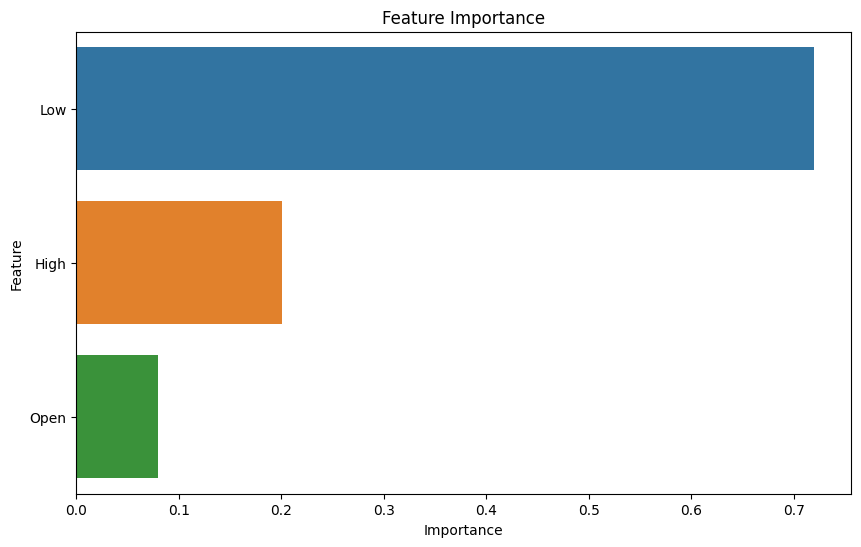

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


5.14. Feedback Loops: Implement retraining based on updated data.

5.15. Automated Machine Learning (AutoML): Automatically search for optimal models and hyperparameters.


# Conclusion

 summary, we have completed the following steps in building a stock closing price prediction project for Yes Bank:



1.   Defined the problem and project objectives.
2.   Collected relevant historical stock price data.
3.   Preprocessed the data by handling missing values and outliers.
4.   Explored the data through various analyses, visualizations, and statistical tests.
5.   Selected, trained, and evaluated machine learning models for stock price prediction.

6.   Prepared for model deployment and documentation.

## This is my ML case study, thats why i only train 1 model and simple visualizations which easy to understand. In short this a simple Ml mode with all instructions. I use one of capstones projects dataset (regression- yes bank closing stock prediction).                                                                 Thank you :)